In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import seaborn as sns
import csv

In [2]:
bvb_turns = pd.read_csv('../csv/BvB_turns.csv', sep='\n')
bvb_states = pd.read_csv('../csv/BvB_states.csv', sep='\n')
bvb_games_turns = bvb_turns['Turns'].tolist()
bvb_games_states = bvb_states['States'].tolist()

In [3]:
from get_prob_matrix import get_prob_matrix
from get_prob_matrix_symmetry import get_prob_matrix_symmetry
from get_fundamental_matrix import get_fundamental_matrix
from get_mean_time import get_mean_time

In [17]:
np.mean(bvb_games_turns)

75.29083

In [4]:
N = 16

qr, probability_matrix = get_prob_matrix(N, bvb_games_states)
qr_symm, probability_matrix_symm = get_prob_matrix_symmetry(N, bvb_games_states)
fundamental_matrix = get_fundamental_matrix(probability_matrix)
fundamental_matrix_symm = get_fundamental_matrix(probability_matrix_symm)
mean_time = get_mean_time(N - 1, fundamental_matrix)
mean_time_symm = get_mean_time(N - 1, fundamental_matrix_symm)
print("mean time: ", mean_time)
print("mean time symm: ", mean_time_symm)

even = 0
odd = 0
for i in bvb_games_turns:
    if i % 2 == 0:
        even +=1
    else:
        odd +=1 
print(even / len(bvb_games_turns))
print(odd / len(bvb_games_turns))

mean time:  75.29083000000001
mean time symm:  75.29083
0.49359
0.50641


In [5]:
from digitalize_states import digitalize_states
from convert_games2states import convert_games2states
from get_all_games import get_all_games
from get_game_trajectories import get_game_trajectories

states = digitalize_states(bvb_games_states)

#bvb_states = np.empty((17,17))
#for i in range(0, 17):
#    for j in range (0, 17):
#        bvb_states[i, j] = states.count((i, j)) / len(states)


#bvb_states_symm = convert_games2states(get_all_games(N, get_game_trajectories(states)))
#bvb_symm = np.empty((17, 17))
#for i in np.arange(0, 17):
#    for j in np.arange (0, 17):
#        bvb_symm[i, j] = bvb_states_symm.count((i, j)) / len(bvb_states_symm)

In [6]:
# for trajectories
from find_closest import find_closest
from write_states2csv import write_states2csv

games = get_game_trajectories(states)

k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(bvb_games_turns, 0.25) + k, bvb_games_turns)
    closest2mean_index = find_closest(mean_time + k, bvb_games_turns)
    closest2long_index = find_closest(np.quantile(bvb_games_turns, 0.75) + k, bvb_games_turns)

    short_game = games[closest2short_index]
    regular_game = games[closest2mean_index]
    long_game = games[closest2long_index]

    write_states2csv("BvB_sampling", "short", short_game, i)
    write_states2csv("BvB_sampling", "regular", regular_game, i)
    write_states2csv("BvB_sampling", "long", long_game, i)

In [7]:
from generate_distribution import generate_distribution

In [11]:
lens, gen_turns = generate_distribution(N, qr)
lens_symm, gen_turns_symm = generate_distribution(N, qr_symm)

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:27<00:00, 3622.14it/s]


In [12]:
len(lens)

100000

In [13]:
print(lens[0])

269


In [14]:
print(np.mean(lens))
print(np.mean(lens_symm))

75.65682
75.61414


In [15]:

even = 0
odd = 0
even_symm = 0
odd_symm = 0
for i in lens:
    if i % 2 == 0:
        even += 1
    else:
        odd += 1
        
for i in lens_symm:
    if i % 2 == 0:
        even_symm += 1
    else:
        odd_symm += 1

        
print(even / len(lens))
print(odd / len(lens))
print(even_symm / len(lens_symm))
print(odd_symm / len(lens_symm))

0.49586
0.50414
0.49488
0.50512


In [19]:
xtick = 50
bin_width = 16
start_point = 40
end_point = 400
bins_ranges = []
gen_turns_count = []

for i in np.arange(8, max(lens)+bin_width, bin_width):
    bins_ranges.append(i)

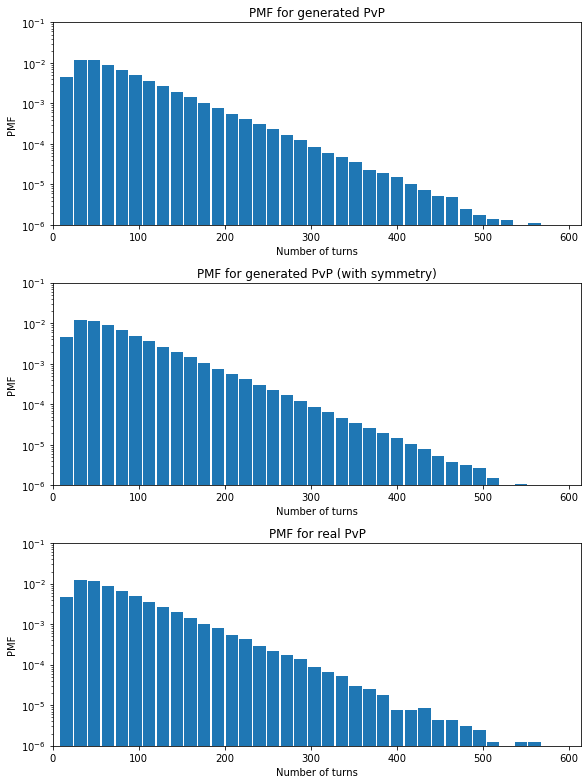

In [11]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
max_x = max(bvb_games_turns)

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvP")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_bvb_gen, bins_bvb_gen, patches_bvb_gen = axes[0].hist(gen_turns, 
                                                        bins=bins_ranges, 
                                                        rwidth=0.9, density=True) 
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvP (with symmetry)")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm, 
                                                                       bins=bins_ranges, 
                                                                       rwidth=0.9, density=True) 
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvP")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_bvb, bins_bvb, patches_bvb = axes[2].hist(bvb_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True)
fig.tight_layout()
plt.show()

In [13]:
xs_sampling = []
ys_sampling = []
for i in range (0, len(bins_bvb_gen) - 1):
    xs_sampling.append(bins_bvb_gen[i] + (bins_bvb_gen[i + 1] - bins_bvb_gen[i]) / 2)
ys_sampling = n_bvb_gen

In [21]:
from model_pvp import model_pvp

In [22]:
d, prob, (even, odd) = model_pvp(N, qr)
d_symm, prob_symm, (even_symm, odd_symm) = model_pvp(N, qr_symm)

In [23]:
print(sum(d))
print(sum(d_symm))
print(even)
print(odd)
print(even_symm)
print(odd_symm)

75.2908299999999
75.2908299999996
0.4935899999999997
0.5064099999999989
0.4935899999999998
0.50641


NameError: name 'xs' is not defined

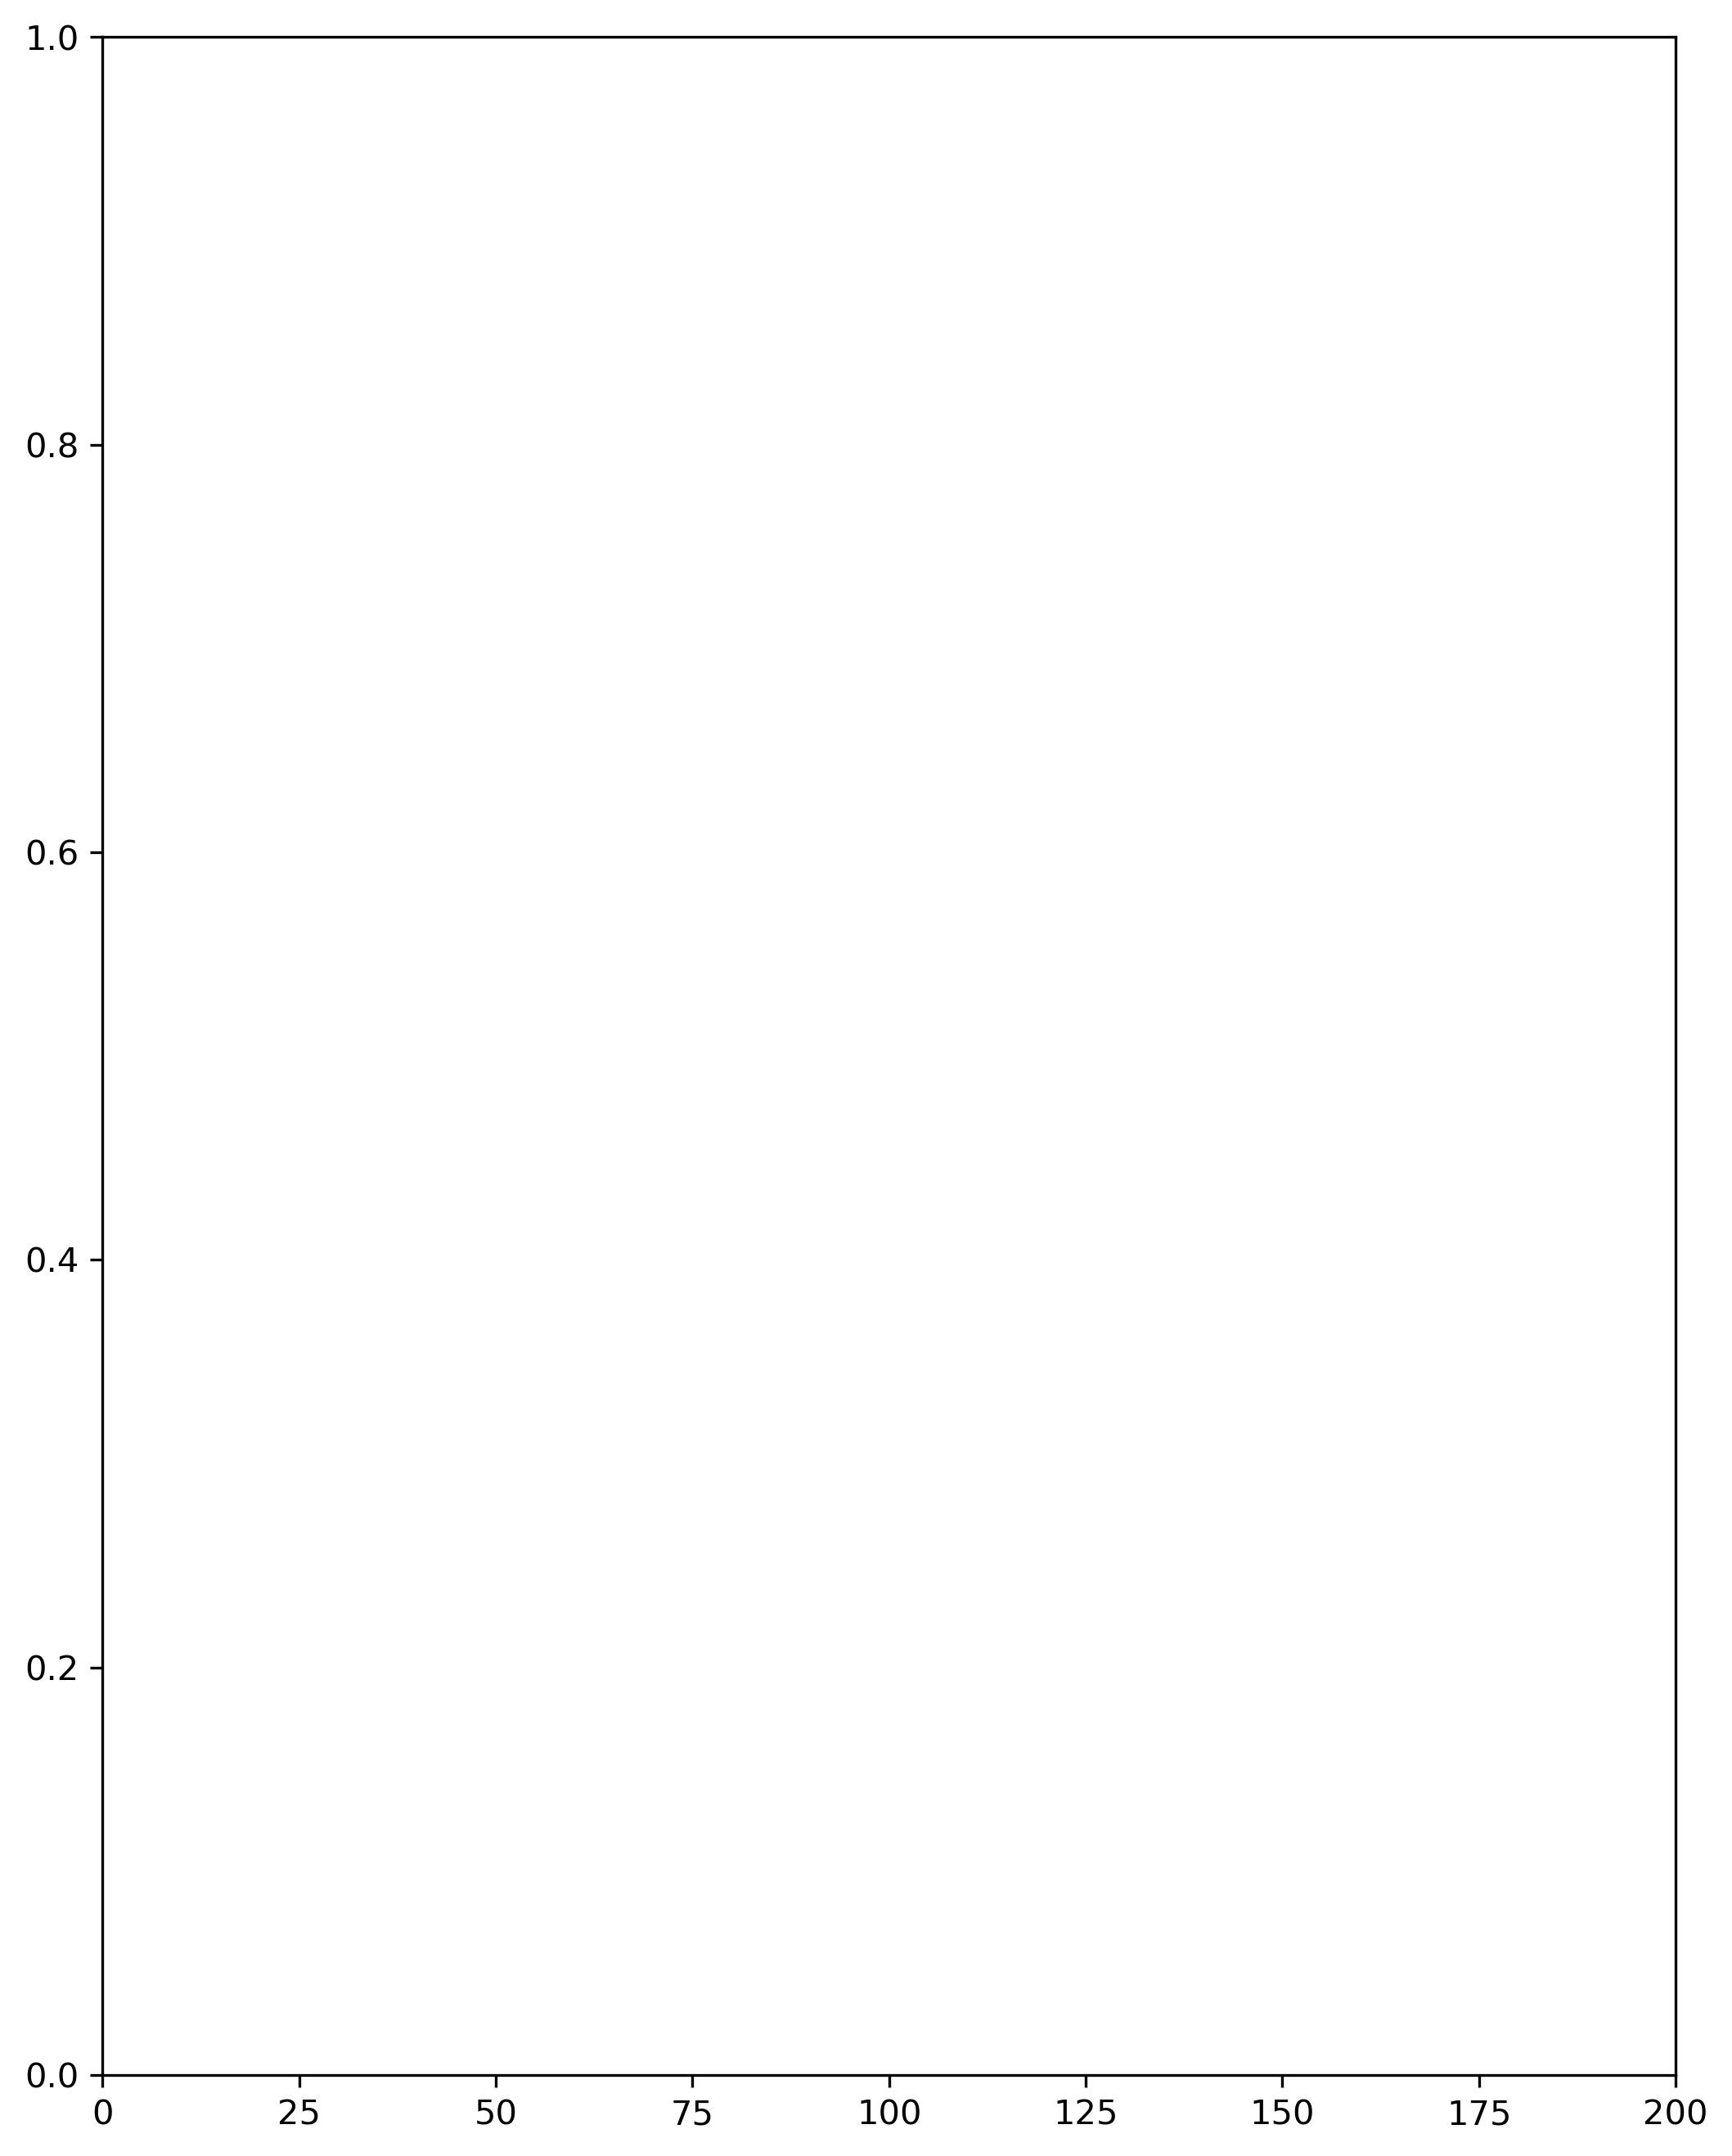

In [17]:
plt.rcParams['figure.figsize']=(8.27, 11)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 200)
plt.xticks(xs[0:16])
plt.grid()

xs = []
ys = []
x0 = 8 + bin_width / 2
for i in range (0, len(prob) // bin_width):
    xs.append(x0 + bin_width * i)
for i in range (0, len(prob) // bin_width):
    ys.append(sum(prob[bin_width * i : bin_width * (i + 1)]) / bin_width)
plt.plot(xs, ys,'.-')
plt.yscale("log")
plt.show()

In [ ]:
xs_ys = [[],[]]
xs_ys[0].append("x")
xs_ys[1].append("y")
xs_ys[0].extend(xs)
xs_ys[1].extend(ys)
xs_ys = np.array(xs_ys)
xs_ys = np.transpose(xs_ys)

In [ ]:
with open("../csv/bvb_model.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(xs_ys)

In [ ]:
bvb_count = []
uniques = np.array(gen_turns)
uniques = np.unique(uniques)
for i in uniques:
    bvb_count.append(gen_turns.count(i) / len(gen_turns))
    
bvb_count_symm = []
uniques_symm = np.array(gen_turns_symm)
uniques_symm = np.unique(uniques)
for i in uniques:
    bvb_count_symm.append(gen_turns_symm.count(i) / len(gen_turns_symm))

In [ ]:
#plt.plot(uniques, pvp_count)
plt.yscale("log")
plt.xlabel("Number of turns")
plt.ylabel("PMF")
plt.title("PMF for real BvB")



plt.ylim(ymin = 0.000001, ymax = 0.1)
#plt.plot(uniques, pvp_count, 'g.', label="Sampling")
plt.plot(xs_sampling, ys_sampling, 'g-', label="Sampling")
plt.xlim([0, 2000])

n_pvp, bins_pvp, patches_pvp = plt.hist(bvb_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True, label="hist")

#plt.plot(prob, 'r.', label="Modelling")
plt.plot(xs, ys, 'r-', label="Modelling")
plt.legend()
#pvp_count = np.array(pvp_count)
#pvp_count = pvp_count / sum(pvp_count)
plt.show()

In [ ]:
d, prob, (even, odd) = model_pvp(N, qr)
d_symm, prob_symm, (even_symm, odd_symm) = model_pvp(N, qr_symm)